<a href="https://colab.research.google.com/github/Vedika1110/NNDL-Lab/blob/main/RNN_LSTM_Monthly_milk_production_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing neccessary liabraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/monthly-milk-production-pounds.csv' , index_col='Month', parse_dates = True)
df.index.freq='MS'

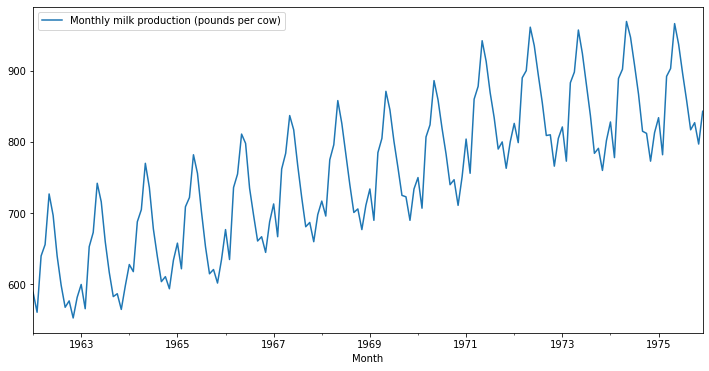

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

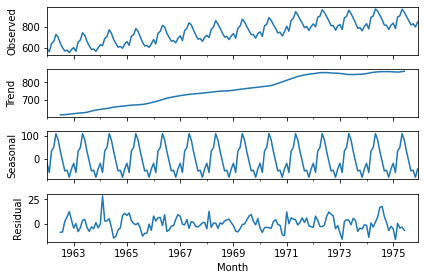

In [ ]:
results = seasonal_decompose(df['Monthly milk production (pounds per cow)'])
results.plot();

In [ ]:
len(df)

168

In [ ]:
train = df.iloc[:156]          #all data except last 12 month data
test = df.iloc[156:]           #last 12 month data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(), df.tail()

(            Monthly milk production (pounds per cow)
 Month                                               
 1962-01-01                                       589
 1962-02-01                                       561
 1962-03-01                                       640
 1962-04-01                                       656
 1962-05-01                                       727,
             Monthly milk production (pounds per cow)
 Month                                               
 1975-08-01                                       858
 1975-09-01                                       817
 1975-10-01                                       827
 1975-11-01                                       797
 1975-12-01                                       843)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

**Define the generator**

In [ ]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
x,y = generator[0]
print(f'Given the Array: \n{x.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
x.shape

(1, 3, 1)

we got 1 row 3 columns and 1 feature

Now same defining the generator for remaining 12 months

In [ ]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

**Define model**

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


 generator creates batches of 3-3 inputs and using that predict the next value

In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 2s 6ms/step - loss: 0.0409
Epoch 2/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0223
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0164
Epoch 4/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0116
Epoch 5/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0090
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0063
Epoch 7/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0064
Epoch 8/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0046
Epoch 9/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0045
Epoch 10/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0055
Epoch 11/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0043
Epoch 12/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0047
Epoch 13/50
144/144 [====

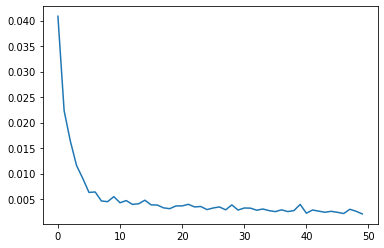

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

taking last 12 months values in training set to make prediction for 1st value in test set

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.6444868]], dtype=float32)

original value was 0.67 model predicted it to be 0.65

In [ ]:
scaled_test[0]

array([0.67548077])

Prediction model

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.6444868], dtype=float32),
 array([0.6296598], dtype=float32),
 array([0.80210674], dtype=float32),
 array([0.86777693], dtype=float32),
 array([0.9631295], dtype=float32),
 array([0.9460118], dtype=float32),
 array([0.880466], dtype=float32),
 array([0.7856482], dtype=float32),
 array([0.67741144], dtype=float32),
 array([0.6312337], dtype=float32),
 array([0.5838421], dtype=float32),
 array([0.6144811], dtype=float32)]

In [ ]:
test.head()

,Monthly milk production (pounds per cow)
Month,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


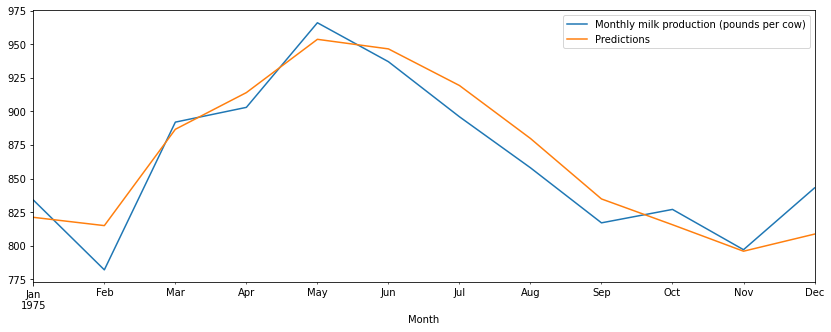

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Monthly milk production (pounds per cow)'],test['Predictions']))
print(rmse)

18.911878193264837
